In [6]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data preprocessing
# Define Paths
import random

CURR_PATH = os.getcwd()
data_path = os.path.join(CURR_PATH, 'data', 'phase2', 'total')
train_path = os.path.join(CURR_PATH, 'data', 'phase2', 'train')
test_path = os.path.join(CURR_PATH, 'data', 'phase2', 'test')
valid_path = os.path.join(CURR_PATH, 'data', 'phase2', 'validate')

# Moving files to seperate dirs
# Do this only once
# print(len(glob.glob(os.path.join(data_path,'human-*'))))
# Move files for Training
def move_files():
    for c in random.sample(glob.glob(os.path.join(data_path,'human-*')), 1000):
    #     print(c)
        shutil.move(c, os.path.join(train_path, 'human'))
    for c in random.sample(glob.glob(os.path.join(data_path,'null-*')), 1000):
        shutil.move(c, os.path.join(train_path, 'null'))
    # Move files for validation
    for c in random.sample(glob.glob(os.path.join(data_path,'human-*')), 350):
        shutil.move(c, os.path.join(valid_path, 'human'))
    for c in random.sample(glob.glob(os.path.join(data_path,'null-*')), 350):
        shutil.move(c, os.path.join(valid_path, 'null'))
    # Move files for test
    for c in random.sample(glob.glob(os.path.join(data_path,'human-*')), 150):
        shutil.move(c, os.path.join(test_path, 'human'))
    for c in random.sample(glob.glob(os.path.join(data_path,'null-*')), 150):
        shutil.move(c, os.path.join(test_path, 'null'))

# move_files()
print("done")


done


In [3]:
# Run cell for using GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs available", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Number of GPUs available 0


In [5]:
# Initilize MobileNet
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 9s 1us/step


In [15]:
def prepare_img(file):
    img_path = 'data/phase1/dataset/main/test/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_arr, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


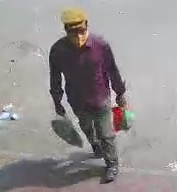

In [16]:
from IPython.display import Image
Image(filename='data/phase1/dataset/main/test/1.jpg', width=300, height=200)

In [17]:
preprocessed_img = prepare_img('1.jpg')
predictions = mobile.predict(preprocessed_img)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04228054', 'ski', 0.25935033),
  ('n04208210', 'shovel', 0.090006486),
  ('n01795545', 'black_grouse', 0.042397134),
  ('n02640242', 'sturgeon', 0.041778494),
  ('n04008634', 'projectile', 0.032279365)]]

In [ ]:
assert results[0][0][1] == 'Human'
